In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time;  from datetime import datetime
import math
plt.rcParams["figure.figsize"] = (15,10)

In [4]:
mobile = pd.read_csv('mobile_bid_adjustments.csv') # read the mobile
# date range -> "June 1, 2017 - January 26, 2018"

summary = mobile.tail(2) # store summary rows separately
mobile = mobile.drop([327,328]) # drop summary columns rows
orig_mobile=pd.read_csv('mobile_bid_adjustments.csv') # read the mobile

In [5]:
mobile.rename(columns={'Avg. CPC':'avg_cpc($)'}, inplace=True)
mobile.rename(columns={'Cost / conv.':'cost_per_conv($)'}, inplace=True)
mobile.rename(columns={'Conv. rate':'conversion_rate(%)'}, inplace=True)
mobile.rename(columns={'Avg. CPC':'avg_cpc($)'}, inplace=True)
mobile.rename(columns={'Cost':'Cost($)'}, inplace=True)
mobile.rename(columns={'CTR':'CTR(%)'}, inplace=True)
mobile.rename(columns={'Conv. value':'Conv. value($)'}, inplace=True)
mobile.rename(columns={'Bid adj.':"Bid adj.(%)"}, inplace=True)

In [69]:
mobile.head()

,Location,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost,state,cityzip
0,"Fremont, Ohio, United States",60.0,72.0,1108.0,6.50,0.43,30.82,2.6,0.0,0.00,0.00,0.0,0.00,Ohio,Fremont
1,"32216, Florida, United States",45.0,51.0,857.0,5.95,0.43,22.04,2.6,0.0,0.00,0.00,0.0,0.00,Florida,32216
2,"Madera, California, United States",60.0,186.0,2187.0,8.50,0.46,85.09,2.6,2.0,42.55,1.08,103.3,1.21,California,Madera
3,"Linden, Alabama, United States",60.0,3.0,79.0,3.80,0.31,0.93,3.0,0.0,0.00,0.00,0.0,0.00,Alabama,Linden
4,"60632, Illinois, United States",-90.0,8.0,263.0,3.04,0.02,0.19,3.7,0.0,0.00,0.00,0.0,0.00,Illinois,60632


### Section 1 - Cleaning and Formatting

In [7]:
### CONVERT DATA INTO FLOATS FOR GRAPHING


# convert dollar amounts into floats for processing

def convert_dollar_float(row):
    try:
        return float(str(row)[1:])
    except:
        return float(str(row)[1:].replace(',', ''))
    
mobile['Cost($)'] = mobile['Cost($)'].apply(convert_dollar_float)
mobile['avg_cpc($)'] = mobile['avg_cpc($)'].apply(convert_dollar_float)
mobile['cost_per_conv($)'] = mobile['cost_per_conv($)'].apply(convert_dollar_float)

# convert percentages into floats for processing

def convert_percentage_float(row):
    try:
        return float(str(row)[:-1])
    except:
        return np.NaN
mobile['conversion_rate(%)'] =mobile['conversion_rate(%)'].apply(convert_percentage_float)    
mobile['CTR(%)'] = mobile['CTR(%)'].apply(convert_percentage_float)    
mobile['Bid adj.(%)']=mobile['Bid adj.(%)'].apply(convert_percentage_float)

# convert strings with commas into floats

def change_comma_values_to_float(row):
    row = str(row).replace(',', '')
    return float(row)

def change_str_float(row):
    try:
        row = str(row).replace(',', '')
        return float(row)
    except:
        return np.NaN
    
mobile.Conversions=mobile.Conversions.apply(change_comma_values_to_float)
mobile['Conv. value($)']=mobile['Conv. value($)'].apply(change_comma_values_to_float)
mobile['Avg. pos.']=mobile['Avg. pos.'].apply(change_str_float)
mobile['Clicks']=mobile['Clicks'].apply(change_str_float)
mobile['Impr.']=mobile['Impr.'].apply(change_str_float)


# convert bid adjustment to float
def strip_first_last(row):
    try:
        row  = (str(row)[1:-1])
        return float(row)
    except:
        return 0



In [9]:
### Extract State and city/zip data from Location

# Extract state from location data
def state_from_location(row):
    try:
        row = str(row).split(',')
        return row[-2].strip()
    except:
        return np.nan
mobile['state'] = mobile.Location.apply(state_from_location)

# Extract city or zip from location data
def cityzip_from_location(row):
    try:
        row = str(row).split(',')
        return row[-3].strip()
    except:
        return np.nan
mobile['cityzip'] = mobile.Location.apply(cityzip_from_location)


In [8]:
mobile.describe()

,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost
count,493.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,490.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000
mean,19.835700,4807.721212,7.023261e+04,6.716667,0.345434,1620.025596,2.826531,85.816162,18.256384,1.666444,7.222667e+03,5.051051
std,44.910835,50555.028390,7.383695e+05,1.815583,0.131202,17041.622506,0.323374,902.723163,23.044575,2.242880,7.600081e+04,17.835417
min,-90.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,-15.000000,79.500000,1.178500e+03,5.900000,0.280000,27.300000,2.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,36.000000,196.000000,2.987000e+03,7.010000,0.380000,71.760000,2.700000,3.000000,15.400000,1.300000,2.109400e+02,2.580000
75%,60.000000,633.000000,9.158000e+03,7.825000,0.450000,237.495000,3.000000,12.000000,25.065000,2.010000,1.078525e+03,5.020000
max,60.000000,796336.000000,1.162856e+07,16.190000,0.590000,268700.010000,3.900000,14209.000000,304.750000,26.920000,1.196464e+06,362.820000


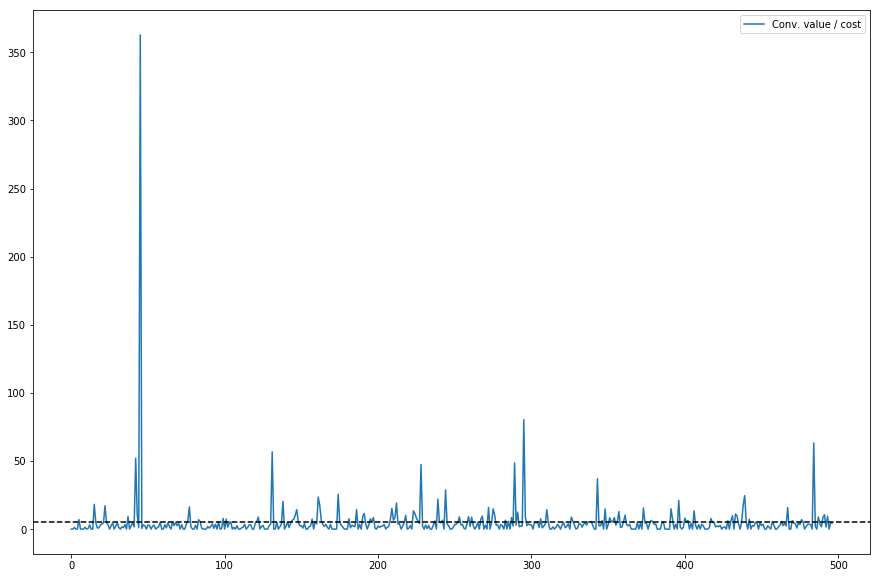

In [10]:
# This is the average revenue in $ per dollar spent on advertising.
# We should try to even out this graph, with ideally everything ~= 1 (thats for marginal though. Hmmmm)
# So press down the bumps with an increase in spending, and pull up the troughs by decreasing spending.

mobile[["Conv. value / cost"]].plot().axhline(y=mobile["Conv. value / cost"].describe().iloc[1], color='black', linestyle='--')

### Section 2 - State Level

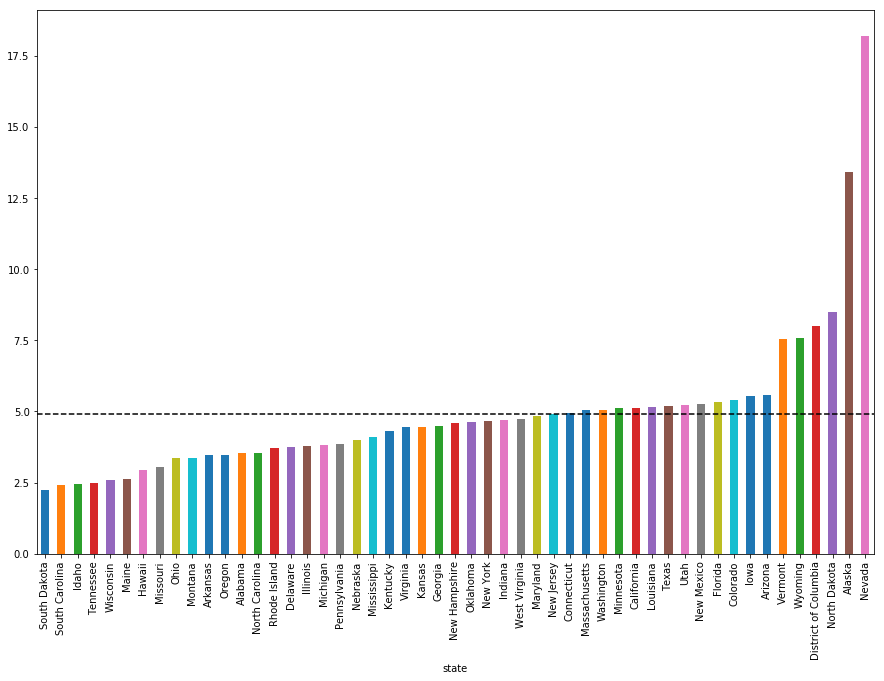

In [81]:
# Examining State Level Bid Adjustments
# Plot - Conv. Value / Cost


state_adjustments = mobile[mobile.cityzip.isna()]
state_adjustments = state_adjustments[~state_adjustments.state.isna()]
state_adjustments = state_adjustments.set_index('state')
state_adjustments = state_adjustments.sort_values('Conv. value / cost')
state_adjustments['Conv. value / cost'].plot.bar().axhline(y=state_adjustments["Conv. value / cost"].describe().iloc[1], color='black', linestyle='--')


In [14]:
# This gives us 2 issues to examine - wether we are underbidding at the tail (right),
# and/or overbidding at the head (left)

In [15]:
# Underbidding at right

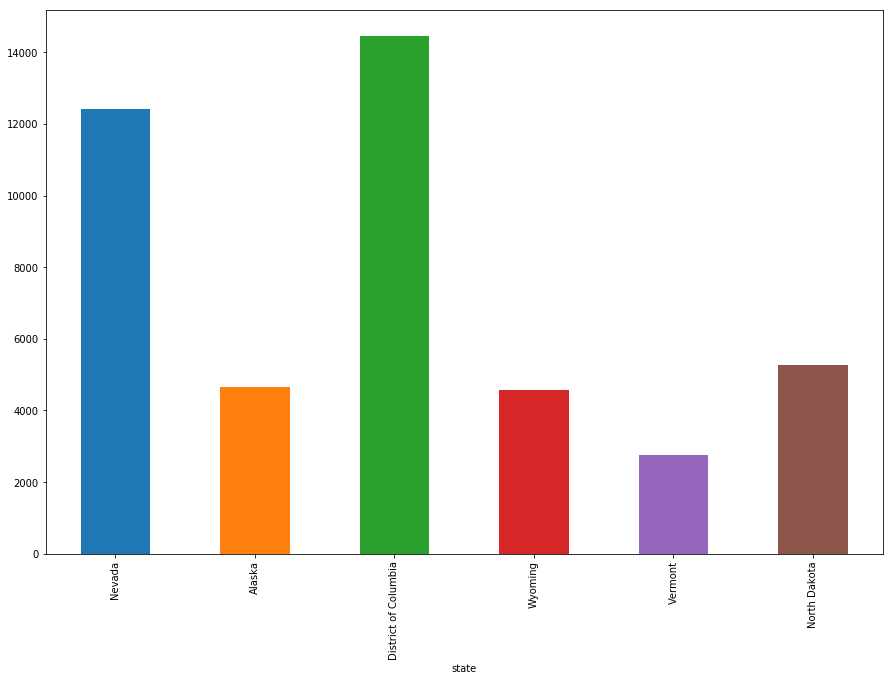

In [77]:
state_adjustments.tail(6)['Conv. value($)'].plot.bar()

In [17]:
state_adjustments.tail(6)

,Location,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost,cityzip
state,,,,,,,,,,,,,,
Vermont,"Vermont, United States",-15.0,1229.0,17899.0,6.87,0.30,364.60,3.0,28.0,13.02,2.28,2751.68,7.55,NaN
Wyoming,"Wyoming, United States",30.0,1653.0,22872.0,7.23,0.37,604.75,3.0,47.0,12.83,2.85,4563.33,7.57,NaN
District of Columbia,"District of Columbia, United States",45.0,4705.0,67808.0,6.94,0.38,1806.58,2.6,145.0,12.46,3.08,14450.32,8.00,NaN
North Dakota,"North Dakota, United States",0.0,1958.0,28348.0,6.91,0.32,620.38,3.0,47.0,13.20,2.40,5259.60,8.48,NaN
Alaska,"Alaska, United States",30.0,1041.0,14095.0,7.39,0.33,347.12,2.8,55.0,6.31,5.28,4656.91,13.42,NaN
Nevada,"Nevada, United States",0.0,2034.0,29739.0,6.84,0.34,683.25,2.8,115.0,5.94,5.66,12419.84,18.19,NaN


In [70]:
# In this graph, we're seeing only sales that came through state level BAs.
# Increase bids in Nevada 
# Also, given its relatively high Conv. Value, maybe a slight bump in DC maybe warranted as well.

In [75]:
# Overbidding on left

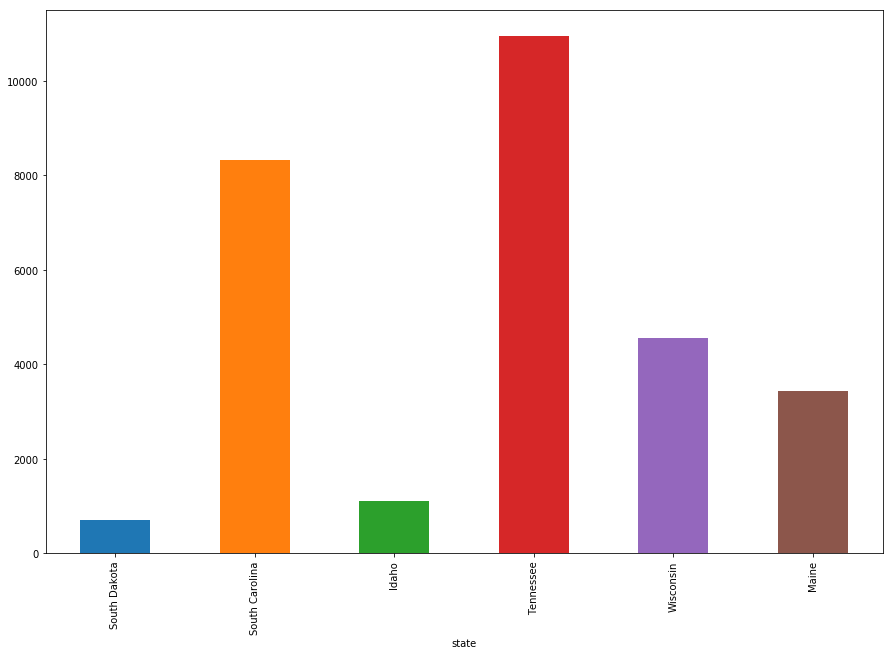

In [79]:
state_adjustments.head(6)['Conv. value($)'].plot.bar()

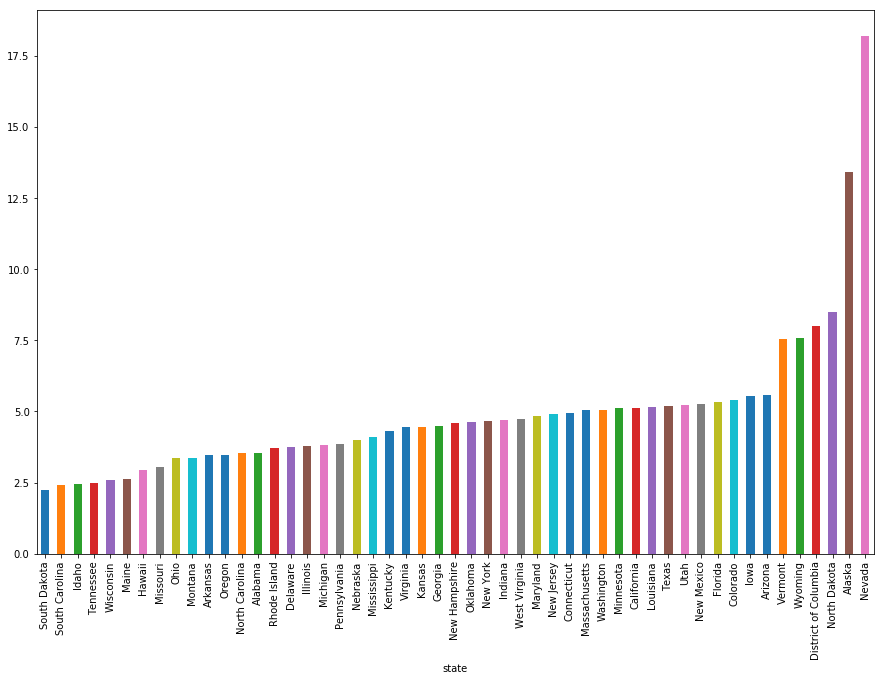

In [80]:
state_adjustments.sort_values('Conv. value / cost')['Conv. value / cost'].plot.bar()

In [82]:
state_adjustments.sort_values('Conv. value / cost').head()

,Location,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost,cityzip
state,,,,,,,,,,,,,,
South Dakota,"South Dakota, United States",-15.0,1241.0,20665.0,6.01,0.25,316.30,3.1,8.0,39.54,0.64,711.99,2.25,NaN
South Carolina,"South Carolina, United States",15.0,10739.0,156711.0,6.85,0.32,3452.93,2.9,123.0,28.07,1.15,8333.30,2.41,NaN
Idaho,"Idaho, United States",-45.0,1768.0,29897.0,5.91,0.26,452.33,3.1,16.0,28.27,0.90,1104.88,2.44,NaN
Tennessee,"Tennessee, United States",15.0,13493.0,191569.0,7.04,0.33,4407.56,2.9,170.0,25.93,1.26,10956.40,2.49,NaN
Wisconsin,"Wisconsin, United States",-30.0,7000.0,113056.0,6.19,0.25,1768.44,3.1,63.0,28.05,0.90,4563.30,2.58,NaN


In [84]:
# Decreases in SC and TN maybe warranted, only getting around $2.50 for every $ spent, and they are the the 
# bigger markets here.

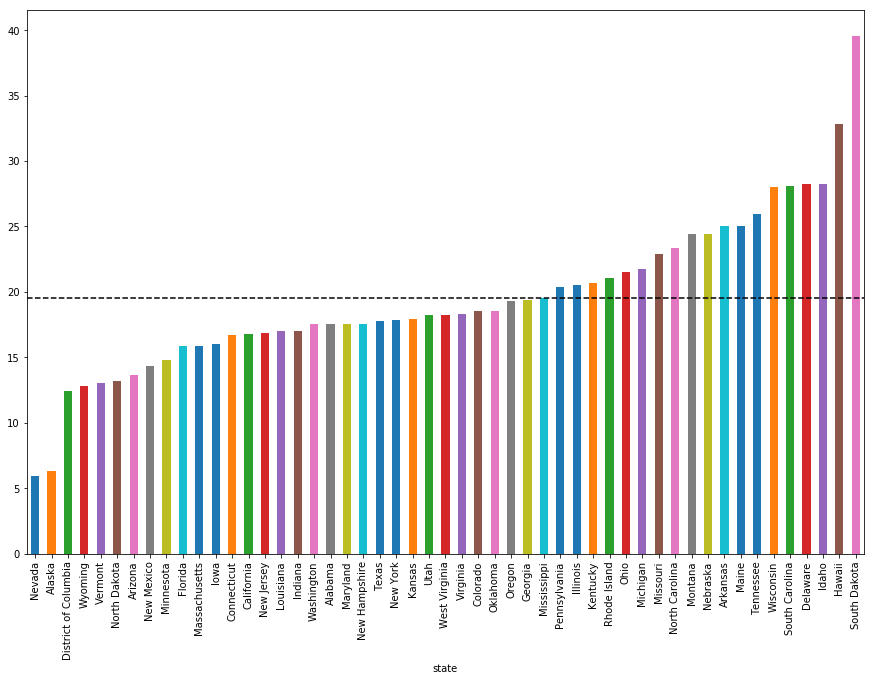

In [24]:
state_adjustments = state_adjustments.sort_values('cost_per_conv($)')
state_adjustments['cost_per_conv($)'].plot.bar().axhline(y=state_adjustments["cost_per_conv($)"].describe().iloc[1], color='black', linestyle='--')

In [85]:
# Graph just bears out in number of conversions, the analysis from before. To be expected.

In [86]:
# Also the reason Hawaii seems a little funny is because a lot of customers are coming in through Honolulu filter

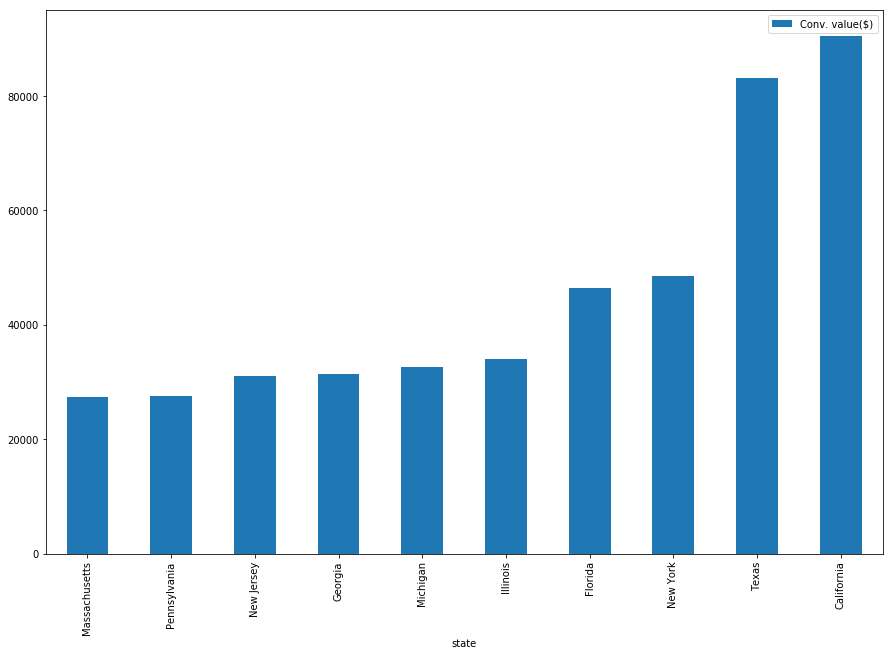

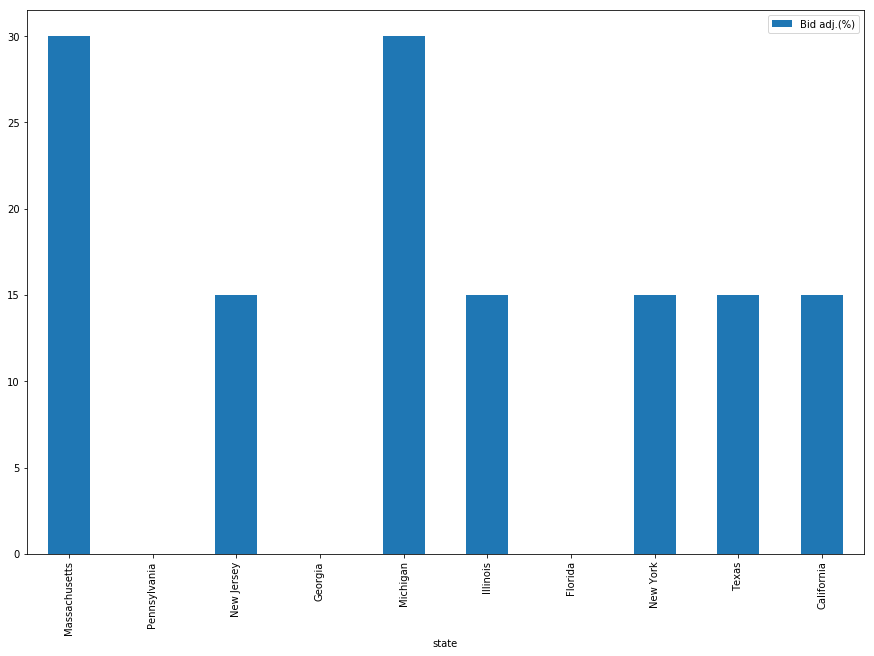

In [98]:
state_adjustments= state_adjustments.sort_values('Conv. value($)')
state_adjustments.tail(10)[['Conv. value($)']].plot.bar()
state_adjustments.tail(10)[['Bid adj.(%)']].plot.bar()

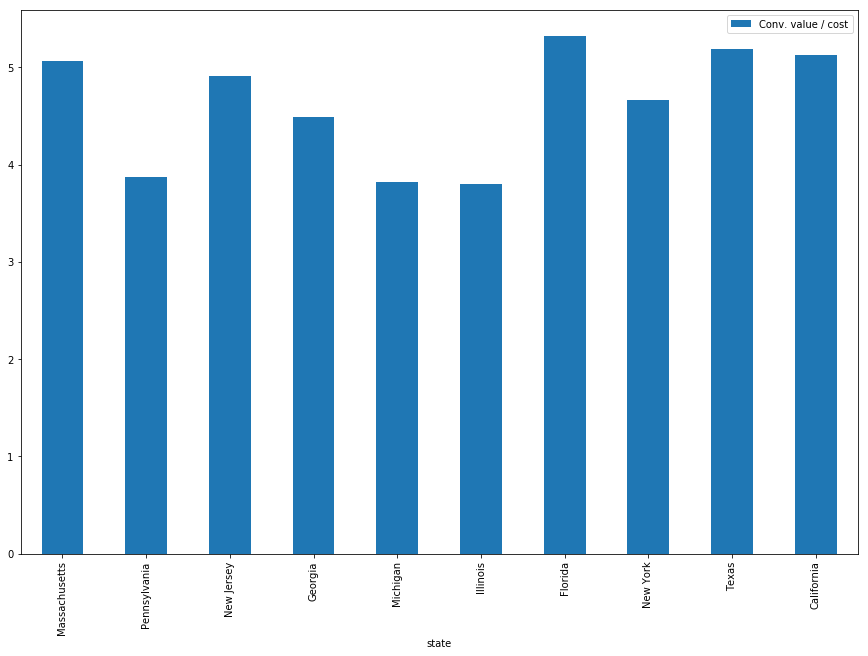

In [101]:
state_adjustments.tail(10)[['Conv. value / cost']].plot.bar()


In [103]:
state_adjustments.tail(10)

,Location,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost,cityzip
state,,,,,,,,,,,,,,
Massachusetts,"Massachusetts, United States",30.0,14450.0,205585.0,7.03,0.37,5404.00,2.8,340.0,15.89,2.35,27334.20,5.06,NaN
Pennsylvania,"Pennsylvania, United States",0.0,22235.0,322785.0,6.89,0.32,7113.45,2.9,349.0,20.38,1.57,27527.43,3.87,NaN
New Jersey,"New Jersey, United States",15.0,18362.0,257157.0,7.14,0.35,6350.14,2.8,376.0,16.89,2.05,31145.99,4.91,NaN
Georgia,"Georgia, United States",0.0,22003.0,325947.0,6.75,0.32,7012.04,2.9,362.0,19.37,1.65,31450.06,4.49,NaN
Michigan,"Michigan, United States",30.0,24054.0,334158.0,7.20,0.36,8550.89,2.7,393.0,21.75,1.63,32684.31,3.82,NaN
Illinois,"Illinois, United States",15.0,26298.0,366706.0,7.17,0.34,8938.66,2.8,435.0,20.55,1.65,33965.61,3.80,NaN
Florida,"Florida, United States",0.0,27796.0,418263.0,6.65,0.31,8735.31,2.9,551.0,15.85,1.98,46488.93,5.32,NaN
New York,"New York, United States",15.0,30691.0,440612.0,6.97,0.34,10414.01,2.9,582.0,17.89,1.90,48474.04,4.66,NaN
Texas,"Texas, United States",15.0,46959.0,666194.0,7.05,0.34,16022.54,2.8,902.0,17.76,1.92,83196.12,5.19,NaN


,Location,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost,cityzip
state,,,,,,,,,,,,,,
North Carolina,"North Carolina, United States",0.0,19136.0,281408.0,6.80,0.31,6013.21,2.9,257.0,23.39,1.34,21214.42,3.53,NaN
New Jersey,"New Jersey, United States",15.0,18362.0,257157.0,7.14,0.35,6350.14,2.8,376.0,16.89,2.05,31145.99,4.91,NaN
Georgia,"Georgia, United States",0.0,22003.0,325947.0,6.75,0.32,7012.04,2.9,362.0,19.37,1.65,31450.06,4.49,NaN
Pennsylvania,"Pennsylvania, United States",0.0,22235.0,322785.0,6.89,0.32,7113.45,2.9,349.0,20.38,1.57,27527.43,3.87,NaN
Michigan,"Michigan, United States",30.0,24054.0,334158.0,7.20,0.36,8550.89,2.7,393.0,21.75,1.63,32684.31,3.82,NaN
Florida,"Florida, United States",0.0,27796.0,418263.0,6.65,0.31,8735.31,2.9,551.0,15.85,1.98,46488.93,5.32,NaN
Illinois,"Illinois, United States",15.0,26298.0,366706.0,7.17,0.34,8938.66,2.8,435.0,20.55,1.65,33965.61,3.80,NaN
New York,"New York, United States",15.0,30691.0,440612.0,6.97,0.34,10414.01,2.9,582.0,17.89,1.90,48474.04,4.66,NaN
Texas,"Texas, United States",15.0,46959.0,666194.0,7.05,0.34,16022.54,2.8,902.0,17.76,1.92,83196.12,5.19,NaN


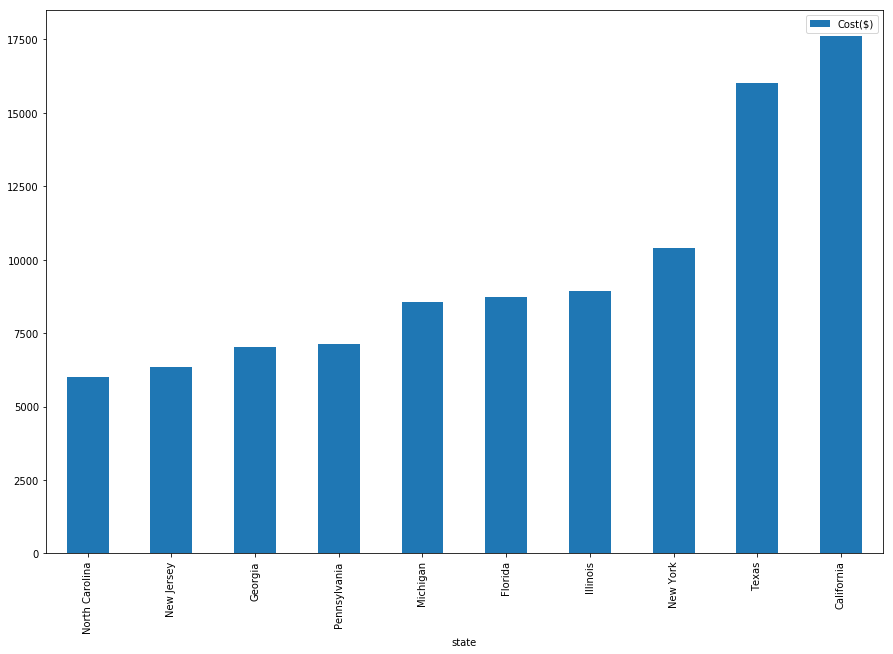

In [106]:
state_adjustments= state_adjustments.sort_values('Cost($)')
state_adjustments.tail(10)[['Cost($)']].plot.bar()
state_adjustments.tail(10)#[['Bid adj.(%)']].plot.bar()

### Section 3 - City Adjustments

In [88]:
city_adjustments = mobile[~mobile.cityzip.isna()].sort_values('cityzip').tail(441-97)
city_adjustments = city_adjustments.set_index('cityzip')
city_adjustments= city_adjustments.sort_values('Conv. value / cost')
# city_adjustments['Conv. value / cost'].plot.bar().axhline(y=city_adjustments["Conv. value / cost"].describe().iloc[1], color='black', linestyle='--')


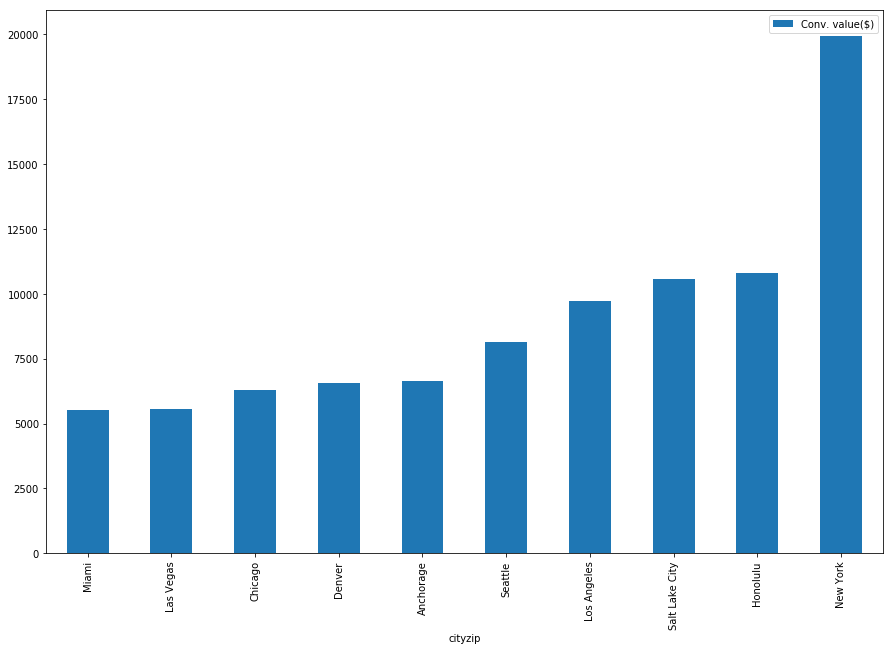

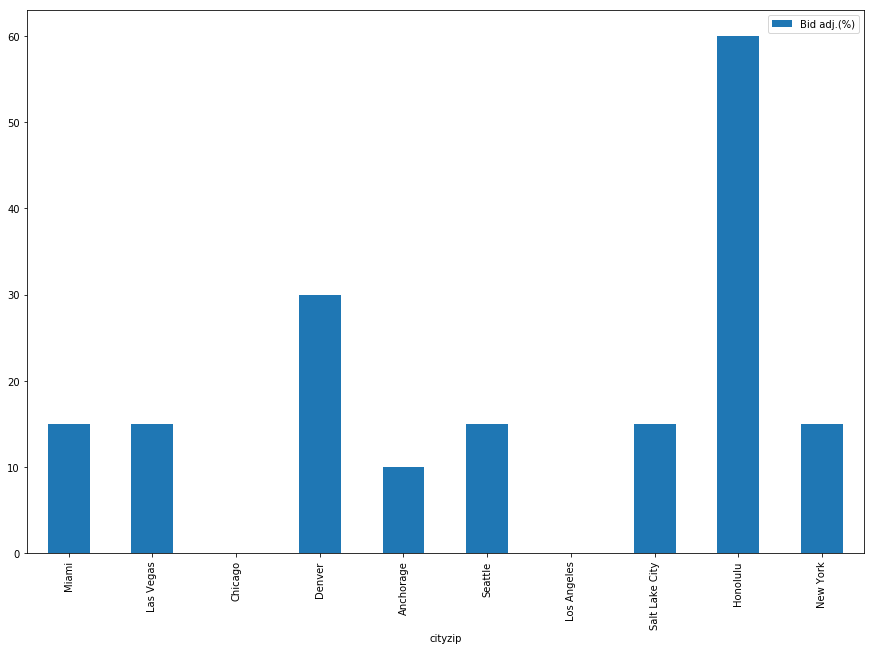

In [91]:
city_adjustments= city_adjustments.sort_values('Conv. value($)')
city_adjustments.tail(10)[['Conv. value($)']].plot.bar()
city_adjustments.tail(10)[['Bid adj.(%)']].plot.bar()
# city_adjustments.tail(10)

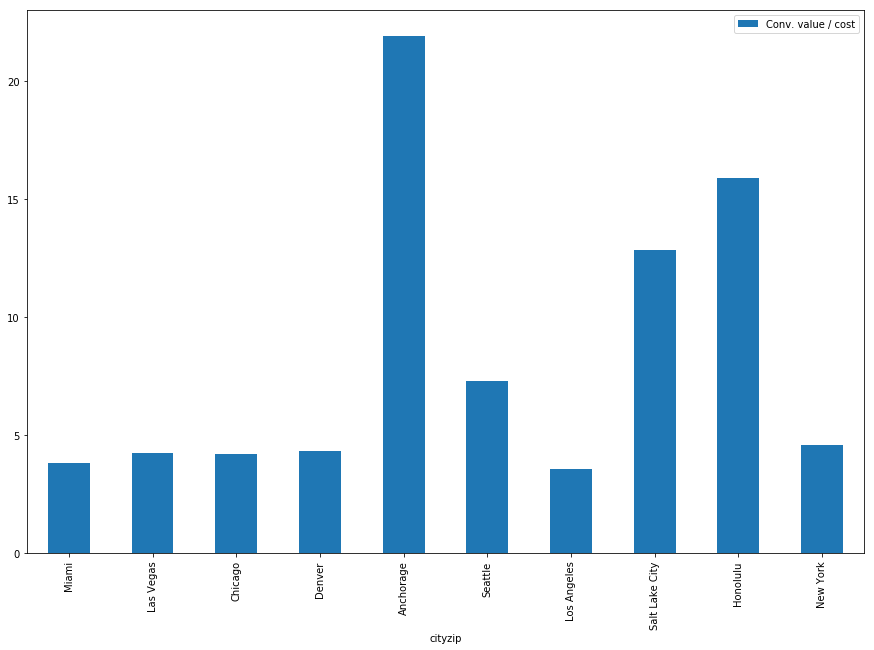

In [93]:
city_adjustments.tail(10)[['Conv. value / cost']].plot.bar()


In [94]:
city_adjustments.tail(10)

,Location,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost,state
cityzip,,,,,,,,,,,,,,
Miami,"Miami, Florida, United States",15.0,4247.0,61345.0,6.92,0.34,1434.55,2.9,73.0,19.65,1.72,5506.85,3.84,Florida
Las Vegas,"Las Vegas, Nevada, United States",15.0,3826.0,60781.0,6.29,0.34,1304.29,2.8,64.0,20.38,1.67,5542.72,4.25,Nevada
Chicago,"Chicago, Illinois, United States",0.0,5387.0,86916.0,6.20,0.28,1500.23,3.0,70.0,21.43,1.30,6305.40,4.20,Illinois
Denver,"Denver, Colorado, United States",30.0,4243.0,63494.0,6.68,0.36,1512.66,2.8,70.0,21.61,1.65,6543.44,4.33,Colorado
Anchorage,"Anchorage, Alaska, United States",10.0,917.0,13179.0,6.96,0.33,303.87,2.8,46.0,6.61,5.02,6654.07,21.90,Alaska
Seattle,"Seattle, Washington, United States",15.0,3768.0,61954.0,6.08,0.30,1114.23,2.8,66.0,16.88,1.75,8142.82,7.31,Washington
Los Angeles,"Los Angeles, California, United States",0.0,8889.0,145094.0,6.13,0.31,2727.68,2.8,129.0,21.14,1.45,9716.16,3.56,California
Salt Lake City,"Salt Lake City, Utah, United States",15.0,2550.0,32494.0,7.85,0.32,823.85,2.5,142.0,5.80,5.57,10579.39,12.84,Utah
Honolulu,"Honolulu, Hawaii, United States",60.0,1655.0,20638.0,8.02,0.41,679.49,2.5,75.0,9.06,4.53,10781.52,15.87,Hawaii


In [95]:
# OKAY THIS IS REALLY IMPORTANT. THAT FIRST GRAPH ISNT SCALED AT ALL!

In [96]:
# TODO - Scale that Graph!

In [107]:
# ZIP Adjustments

In [ ]:
# Ignore for now, less than 1% of revenue, we'll revisit this.

In [30]:
# Cant we just take the top whatever number of zip adjustments we have now zip codes by income level and throw
# in filters?

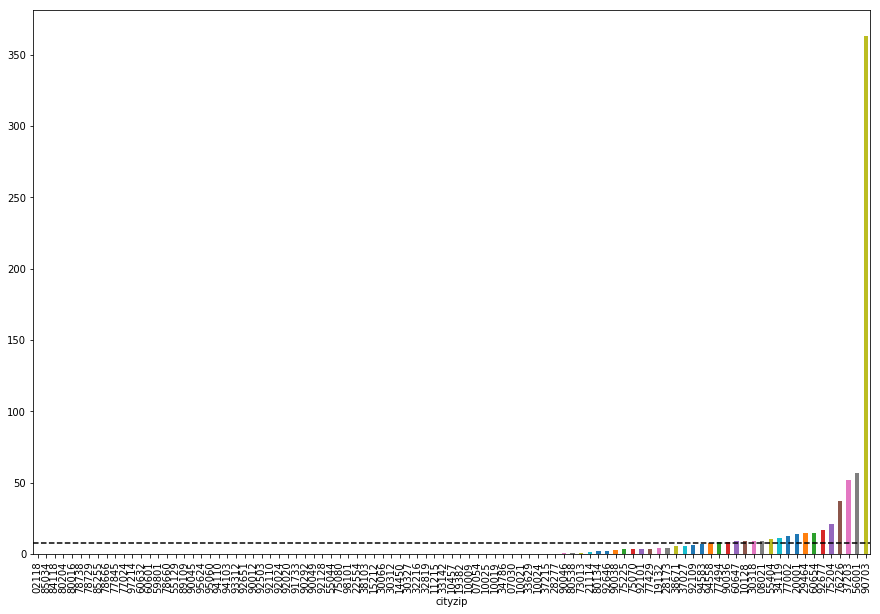

In [31]:
zip_adjustments = mobile[~mobile.cityzip.isna()].sort_values('cityzip').head(97)
zip_adjustments = zip_adjustments.set_index('cityzip')
zip_adjustments = zip_adjustments.sort_values('Conv. value / cost')


# state_adjustments['Conv. value / cost'].plot.bar().axhline(y=state_adjustments["Conv. value / cost"].describe().iloc[1], color='black', linestyle='--')

zip_adjustments['Conv. value / cost'].plot.bar().axhline(y=zip_adjustments["Conv. value / cost"].describe().iloc[1], color='black', linestyle='--')
# zip_adjustments.tail(10)

In [32]:
zip_adjustments[zip_adjustments["Bid adj.(%)"]<0]["Bid adj.(%)"].index.values

array(['02118', '85034', '84118', '80204', '78666', '77845', '77024',
       '97214', '60632', '60601', '59801', '89109', '90045', '95624',
       '95060', '94110', '94103', '90012', '92503', '92020', '55044',
       '98101', '38103', '15212', '30312', '14450', '32819', '10457',
       '07054', '10024', '92101', '30318', '55404', '77002', '20001',
       '75204', '37203', '56001', '90703'], dtype=object)

In [33]:
# zip_adjustments[zip_adjustments['Conv. value / cost']>50]
zip_adjustments.tail(15)

,Location,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost,state
cityzip,,,,,,,,,,,,,,
10128,"10128, New York, United States",45.0,47.0,619.0,7.59,0.50,23.41,2.9,3.0,7.80,6.38,206.42,8.82,New York
30318,"30318, Georgia, United States",-40.0,439.0,8865.0,4.95,0.17,75.58,3.2,8.0,9.42,1.83,680.38,9.03,Georgia
08021,"08021, New Jersey, United States",45.0,114.0,1534.0,7.43,0.42,47.67,2.8,6.0,7.95,5.26,438.40,9.20,New Jersey
55404,"55404, Minnesota, United States",-60.0,79.0,1983.0,3.98,0.09,7.44,3.5,2.0,3.72,2.53,75.98,10.21,Minnesota
34119,"34119, Florida, United States",45.0,36.0,688.0,5.23,0.40,14.31,2.8,2.0,7.16,5.56,159.05,11.11,Florida
77002,"77002, Texas, United States",-60.0,56.0,1611.0,3.48,0.09,5.11,3.3,1.0,5.11,1.79,63.59,12.44,Texas
20001,"20001, District of Columbia, United States",-80.0,130.0,4027.0,3.23,0.05,6.39,3.6,2.0,3.20,1.54,91.21,14.27,District of Columbia
29464,"29464, South Carolina, United States",36.0,168.0,1979.0,8.49,0.40,66.65,2.7,4.0,16.66,2.38,985.49,14.79,South Carolina
60654,"60654, Illinois, United States",45.0,62.0,846.0,7.33,0.42,26.16,2.6,3.0,8.72,4.84,389.30,14.88,Illinois


In [34]:
# TODO

# Find a list of places where this graph is spiking, and graph against number of coversions
# We should try to figure out how many are unique conversions/ as opposed to a returning customers.


In [36]:
# TODO - See if there is a mismatch between adjustment and cost/conv. if there is a positive BA
# but low conversions OR high cost/conversion(?) we should revise downwards



In [37]:
# TODO - Separate state level bids and compare them to agregated bids by city per state. If there is a mismatch,
# Lets say we have a BA of +50% in the state but in the cities and zips we have -50, that doesn't make sense.

#### Reduce BA in segments with 0 conversions and significant outlay

In [39]:
# Sort this by column1
mobile["Conv. value / cost"].value_counts().head()

0.00    138
1.30      4
3.36      3
2.51      3
1.19      3
Name: Conv. value / cost, dtype: int64

In [40]:
# There are a number of records where no conversions happen, and some of them cost a lot of money
# We could turn down the BA on these.
# Is there anything we need to check against for this? 
# The conversion rate here is 0
# Total cost for these ads - once the cost is an int.

cost_where_no_conversion= 0


In [42]:
#ZIP VS STATE VS CITY

In [43]:
print("State", state_adjustments['Conv. value($)'].sum())
print("City",city_adjustments['Conv. value($)'].sum())
print("Zip",zip_adjustments['Conv. value($)'].sum())

State 878532.68
City 301041.27
Zip 9004.7


In [51]:
total = state_adjustments['Conversions'].sum() + city_adjustments['Conversions'].sum() + zip_adjustments['Conversions'].sum()
print("State", state_adjustments['Conversions'].sum(), str(state_adjustments['Conversions'].sum()/total*100)[:4] + "%")
print("City",city_adjustments['Conversions'].sum(), str(city_adjustments['Conversions'].sum()/total*100)[:4]+"%")
print("Zip",zip_adjustments['Conversions'].sum(),str(zip_adjustments['Conversions'].sum()/total*100)[:4] +"%" )


State 10497.0 74.3%
City 3521.0 24.9%
Zip 108.0 0.76%


##### So zipcode adjustments account for less than 1% of transactions. No point playing with these in mobile segment

But confirm with Clay the mehtodology used to parse these